<a href="https://colab.research.google.com/github/amalsalilan/IPL_Infographics_Data_Analytics_-_Data_Visualization_Infosys_Internship_Oct2024/blob/Nagira/UI_forecast_runs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transforming Non-Stationary IPL Time Series Data to Stationary Data

**Audience**:Interns / IPL

---

## Introduction

In this notebook, we'll explore how to transform non-stationary time series data into stationary data using a synthetic dataset from the Indian Premier League (IPL). We will:

- Generate a synthetic IPL dataset.
- Visualize the data to detect non-stationarity.
- Perform stationarity checks using ACF, PACF plots, and statistical tests (ADF, KPSS).
- Apply transformations (differencing, log transformation) to achieve stationarity.
- Interpret the results at each step.

---

## Table of Contents

1. [Generating the Dataset](#1)
2. [Visualizing the Data](#2)
3. [Preprocessing the Data](#3)
4. [Stationarity Check](#4)
5. [Making the Data Stationary](#5)
6. [Observations and Interpretations](#6)
7. [Conclusion](#7)
8. [Next Steps](#8)

## 1. Generating the Dataset <a id="1"></a>

### 1.1 Dataset Description

We will create a synthetic time series dataset representing the **total runs scored in each IPL match over multiple seasons**.

- **Time Frame**: 10 IPL seasons, ~60 matches per season.
- **Variables**:
  - **Date**: Date of each match.
  - **Total_Runs**: Total runs scored in the match.

### 1.2 Data Generation Process

In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.1/320.1 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 96.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 10.6 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [ ]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gradio as gr
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
# Normalize the runs for better performance
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")


# Read the CSV file into a DataFrame
data = pd.read_csv("/content/sample_data/updated_all_season_details.csv", low_memory=False, encoding='latin-1')
import warnings
warnings.filterwarnings("ignore")

---

## 2. Visualizing the Data <a id="2"></a>

### 2.1 Plotting the Time Series

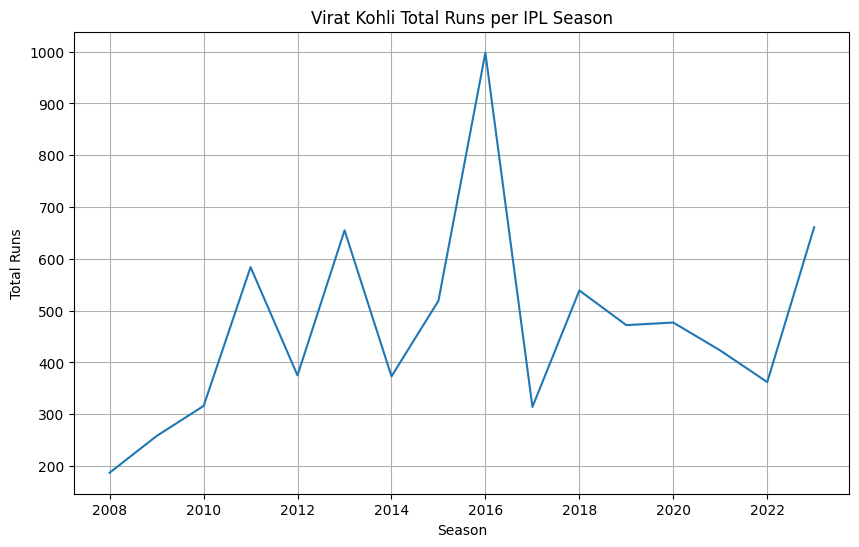

In [ ]:

# Assuming 'virat_season_runs' DataFrame has 'season' and 'runs' columns
plt.figure(figsize=(10, 6))
plt.plot(virat_season_runs['season'], virat_season_runs['runs'])
plt.xlabel('Season')
plt.ylabel('Total Runs')
plt.title('Virat Kohli Total Runs per IPL Season')
plt.grid(True)
plt.show()

**Observation**: The plot shows an upward trend with seasonal fluctuations, indicating non-stationarity.

### 2.2 Histogram and Density Plot

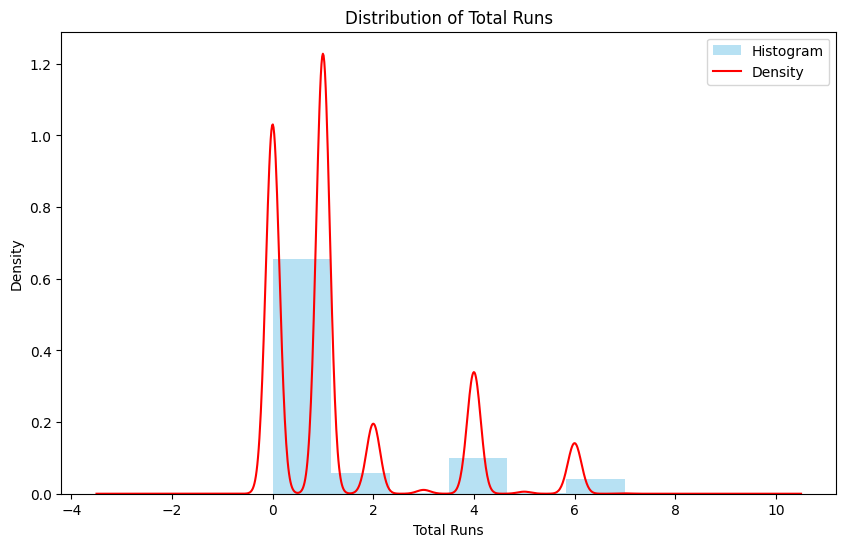

In [ ]:
plt.figure(figsize=(10, 6))
data['runs'].plot(kind='hist', bins=6, density=True, alpha=0.6, color='skyblue', label='Histogram')
data['runs'].plot(kind='kde', color='red', label='Density')
plt.title('Distribution of Total Runs')
plt.xlabel('Total Runs')
plt.legend()
plt.show()

**Observation**: The distribution is skewed due to the trend and seasonality.

---

## 3. Preprocessing the Data <a id="3"></a>

### 3.1 Handling Missing Values

Since we generated the data, there are no missing values. In real datasets, you would check for and handle missing data appropriately.

### 3.2 Outlier Detection

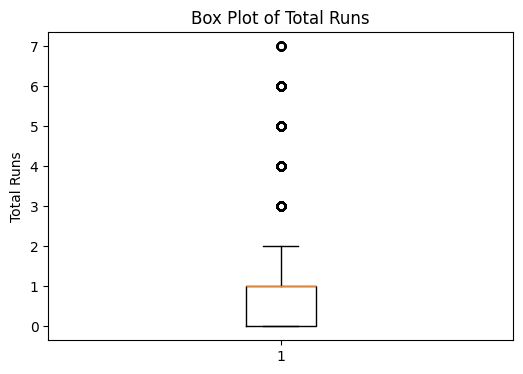

In [ ]:
plt.figure(figsize=(6, 4))
plt.boxplot(data['runs'])
plt.title('Box Plot of Total Runs')
plt.ylabel('Total Runs')
plt.show()

**Observation**: No significant outliers are present.

### 3.3 Feature Engineering

#### Lag Features

In [ ]:
data['Lag_1'] = data['runs'].shift(1)
data['Lag_2'] = data['runs'].shift(2)

#### Time-based Features

In [ ]:
data.index = pd.to_datetime(data.index)

In [ ]:
data['Month'] = data.index.month
data['Year'] = data.index.year

---

## 4. Stationarity Check <a id="4"></a>

### 4.1 Autocorrelation and Partial Autocorrelation Plots

#### Autocorrelation Function (ACF) Plot

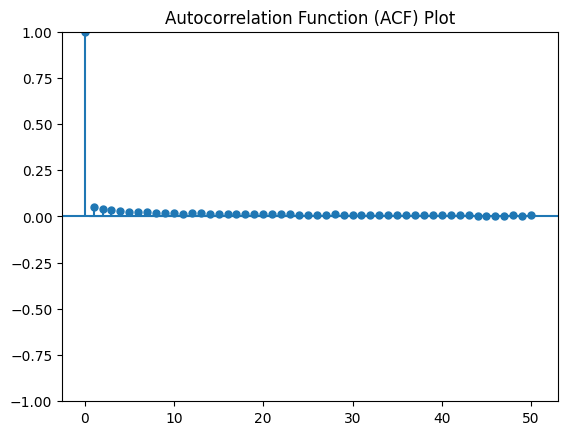

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(data['runs'].dropna(), lags=50)
plt.title('Autocorrelation Function (ACF) Plot')
plt.show()

#### Partial Autocorrelation Function (PACF) Plot

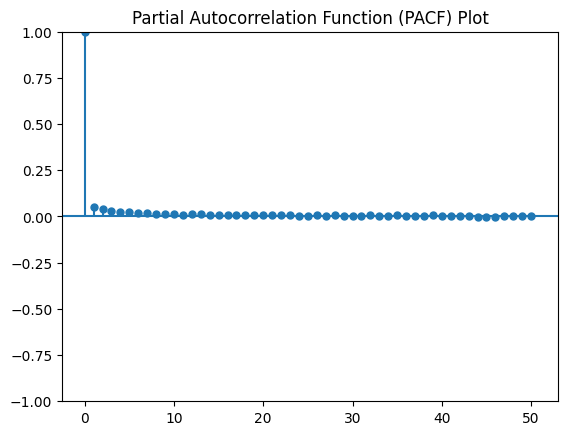

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(data['runs'].dropna(), lags=50)
plt.title('Partial Autocorrelation Function (PACF) Plot')
plt.show()

**Interpretation**:

- **ACF Plot**: Slow decay indicates non-stationarity.
- **PACF Plot**: Significant lags suggest autoregressive components.

### 4.2 Augmented Dickey-Fuller (ADF) Test

In [ ]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(data['runs'].dropna())
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -64.687619
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


**Interpretation**:

- **Null Hypothesis (H0)**: The series is non-stationary.
- If **p-value > 0.05**, fail to reject H0; the series is non-stationary.

### 4.3 Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test

In [ ]:
from statsmodels.tsa.stattools import kpss

kpss_result = kpss(data['runs'].dropna(), regression='c')
print('KPSS Statistic: %f' % kpss_result[0])
print('p-value: %f' % kpss_result[1])
print('Critical Values:')
for key, value in kpss_result[3].items():
    print('\t%s: %.3f' % (key, value))

KPSS Statistic: 7.479512
p-value: 0.010000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


**Interpretation**:

- **Null Hypothesis (H0)**: The series is stationary.
- If **p-value < 0.05**, reject H0; the series is non-stationary.

---

## 5. Making the Data Stationary <a id="5"></a>

### 5.1 Differencing

#### First Order Differencing

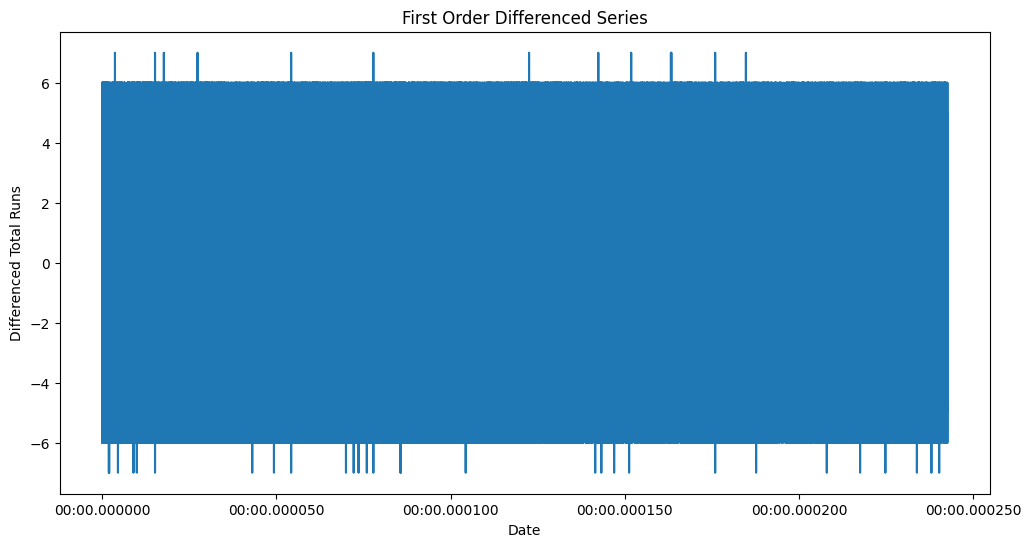

In [ ]:
data['Diff_1'] = data['runs'] - data['runs'].shift(1)

plt.figure(figsize=(12, 6))
plt.plot(data['Diff_1'])
plt.title('First Order Differenced Series')
plt.xlabel('Date')
plt.ylabel('Differenced Total Runs')
plt.show()

#### ADF Test on Differenced Data

In [ ]:
adf_result_diff = adfuller(data['Diff_1'].dropna())
print('ADF Statistic: %f' % adf_result_diff[0])
print('p-value: %f' % adf_result_diff[1])
print('Critical Values:')
for key, value in adf_result_diff[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -89.229394
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


**Interpretation**:

- If **p-value < 0.05**, reject H0; the differenced series is stationary.

### 5.2 Log Transformation

#### Apply Log Transformation

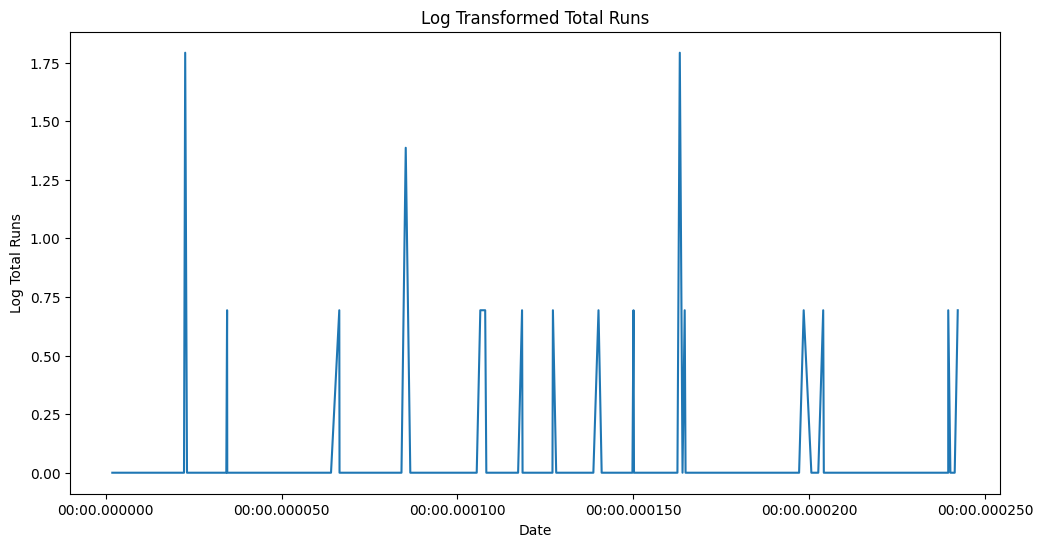

In [ ]:
#data['Log_Total_Runs'] = np.log(data['runs'])
data['Log_Total_Runs'] = np.log(data['runs']).replace([np.inf, -np.inf], np.nan)
data['Log_Diff_1'] = data['Log_Total_Runs'] - data['Log_Total_Runs'].shift(1)
data['Log_Diff_1'].dropna(inplace=True)
data.dropna(inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(data['Log_Total_Runs'])
plt.title('Log Transformed Total Runs')
plt.xlabel('Date')
plt.ylabel('Log Total Runs')
plt.show()

#### ADF Test on Log Differenced Data

In [ ]:
adf_result_log_diff = adfuller(data['Log_Diff_1'])
print('ADF Statistic: %f' % adf_result_log_diff[0])
print('p-value: %f' % adf_result_log_diff[1])
print('Critical Values:')
for key, value in adf_result_log_diff[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -15.615309
p-value: 0.000000
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573


**Interpretation**:

- **p-value < 0.05** indicates the series is now stationary.

### 5.3 Re-Checking ACF and PACF Plots

#### ACF Plot of Differenced Series

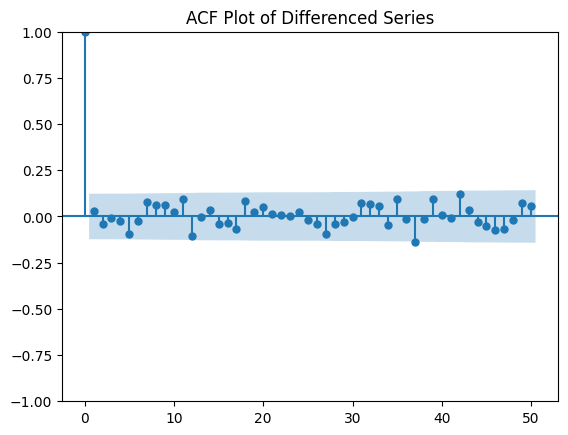

In [ ]:
plot_acf(data['Diff_1'].dropna(), lags=50)
plt.title('ACF Plot of Differenced Series')
plt.show()

#### PACF Plot of Differenced Series

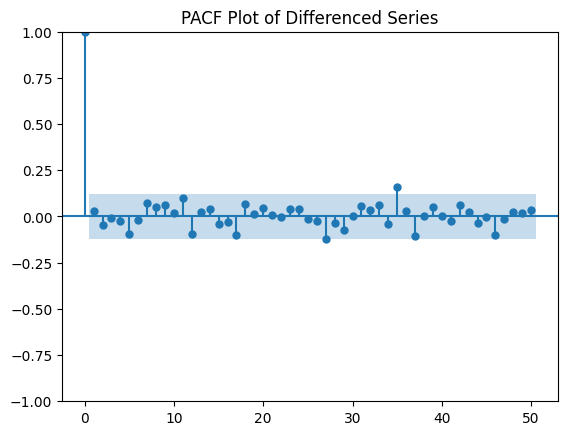

In [ ]:
plot_pacf(data['Diff_1'].dropna(), lags=50)
plt.title('PACF Plot of Differenced Series')
plt.show()

**Observation**:

- Autocorrelation drops off rapidly, indicating stationarity.

---

## 6. Observations and Interpretations <a id="6"></a>

### 6.1 Understanding the Tests

- **ADF Test**:
  - **Null Hypothesis (H0)**: The time series is non-stationary.
  - **If p-value < 0.05**: Reject H0; the series is stationary.
- **KPSS Test**:
  - **Null Hypothesis (H0)**: The time series is stationary.
  - **If p-value < 0.05**: Reject H0; the series is non-stationary.
- **Using Both Tests**:
  - Confirms stationarity status from two perspectives.

### 6.2 Importance of Stationarity

- **Stationarity** is crucial for time series forecasting models.
- Non-stationary data can lead to unreliable results.
- Transforming data to be stationary ensures model assumptions are met.

---

## 7. Conclusion <a id="7"></a>

We have successfully:

- Generated a synthetic IPL dataset representing total runs per match over time.
- Visualized the data, revealing an upward trend and seasonality.
- Performed stationarity checks using ACF, PACF plots, and statistical tests (ADF, KPSS).
- Interpreted the results, confirming the data is non-stationary.
- Applied transformations (differencing, log transformation) to make the data stationary.
- Re-evaluated stationarity, confirming the effectiveness of the transformations.

---

## 8. Next Steps <a id="8"></a>

With the stationary data, you can proceed to:

- **Model Selection**: Choose appropriate time series models like ARIMA, SARIMA, or advanced models like LSTM.
- **Model Training**: Train the model using the transformed data.
- **Forecasting**: Generate forecasts and validate model performance.

---


---

# Forecast Using SARIMAX

In [2]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 MB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.1/320.1 kB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 103.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 12.7 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [3]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gradio as gr
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings

warnings.filterwarnings("ignore")

# Read the CSV file into a DataFrame
data = pd.read_csv("/content/sample_data/updated_all_season_details.csv", low_memory=False, encoding='latin-1')

batsman = ['Virat Kohli', 'Shikhar Dhawan', 'David Warner', 'Rohit Sharma', 'MS Dhoni',
           'Robin Uthappa', 'Jos Buttler', 'Ruturaj Gaikwad']


In [4]:
batsman = ['Virat Kohli', 'Shikhar Dhawan', 'David Warner', 'Rohit Sharma', 'MS Dhoni', 'Robin Uthappa', 'Jos Buttler', 'Ruturaj Gaikwad']

In [5]:

# Function to predict and visualize runs
def predict_runs(player_name, num_years):
    # Fixed starting season
    start_season = 2024

    # Filter for the selected player
    player_data = data[data['batsman1_name'] == player_name]

    # Check if the player exists in the data
    if player_data.empty:
        return f"No data available for player: {player_name}", None

    # Sum of runs by season
    player_season_runs = player_data.groupby('season')['runs'].sum()

    # Convert to DataFrame if it's a Series
    if isinstance(player_season_runs, pd.Series):
        player_season_runs = player_season_runs.reset_index()

    # Convert 'season' to datetime
    player_season_runs['season'] = pd.to_datetime(player_season_runs['season'], format='%Y')
    player_season_runs.set_index('season', inplace=True)

    # Fit the SARIMA model
    model = SARIMAX(player_season_runs,
                    order=(1, 1, 1),  # p, d, q - non-seasonal parameters
                    seasonal_order=(1, 1, 1, 4))  # P, D, Q, m - seasonal parameters

    result = model.fit()

    # Forecast for the specified number of years
    forecast_steps = num_years
    forecast = result.get_forecast(steps=forecast_steps)
    forecast_runs = forecast.predicted_mean.astype(int)

    # Create a DataFrame for the forecast
    forecast_years = pd.date_range(start=f'{start_season}-01-01', periods=forecast_steps, freq='YS')
    forecast_df = pd.DataFrame({'season': forecast_years, 'predicted_runs': forecast_runs.values})

    # Merge the forecast with the original data
    merged_data = pd.concat([player_season_runs.reset_index(), forecast_df], ignore_index=True)
    merged_data['season'] = pd.to_datetime(merged_data['season'])

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(player_season_runs.index, player_season_runs['runs'], label='Actual Runs', marker='o')
    for i, value in enumerate(player_season_runs['runs']):
        plt.text(player_season_runs.index[i], value + 10, f'{value}', ha='center', fontsize=9, color='blue')

    plt.plot(forecast_df['season'], forecast_df['predicted_runs'], label='Predicted Runs', linestyle='--', marker='o')
    for i, value in enumerate(forecast_df['predicted_runs']):
        plt.text(forecast_df['season'][i], value + 10, f'{value}', ha='center', fontsize=9, color='green')

    plt.title(f'{player_name} Season Runs: Actual vs. Predicted')
    plt.xlabel('Season')
    plt.ylabel('Total Runs')
    plt.legend()
    plt.grid(True)

    # Save the plot as an image for Gradio
    plot_file = f"forecast_plot_{player_name.replace(' ', '_')}.png"
    plt.savefig(plot_file)
    plt.close()

    return f"Forecast from 2024 to {2024 + num_years - 1}:", plot_file

# Years range
years = [i for i in range(1, 11)]

# Define the Gradio interface
interface = gr.Interface(
    fn=predict_runs,
    inputs=[
        gr.Dropdown(batsman, label="Select Player"),
        gr.Dropdown(years, label="Number of Years to Forecast", value=3)
    ],
    outputs=[
        gr.Textbox(label="Forecast Summary"),
        gr.Image(label="Forecast Plot")
    ],
    title="Forecast of Player Runs",
    description="Predict the runs of a player for the upcoming seasons starting from 2024.",
    allow_flagging="never"
)
interface.launch()

# Launch the Gradio app
def on_close():
  interface.set_on_close(on_close)

  interface.close()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://c1c43096885592180f.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
